In [128]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [129]:
# Load data
df = pd.read_csv("/Users/myspecialonebrigitta/Desktop/steel_industry.csv")

# Convert 'Time' to datetime(a python norm)
df['Time'] = pd.to_datetime(df['Time'])

# Create 'date' and 'hour' columns
df['date'] = df['Time'].dt.date
df['hour'] = df['Time'].dt.floor('h').dt.time  # round down to hour, extract just time (e.g., 01:00:00)

# Pivot the data: each row is one day, each column is one hour
pivot_df = df.pivot(index='date', columns='hour', values='Load')

# Save the clean hourly load matrix
pivot_df.to_csv("daily_load_matrix.csv")


In [130]:
pivot_df = pivot_df.dropna() 
pivot_df.shape     
pivot_df.head()


hour,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,13.72,14.30,13.76,14.47,13.89,14.18,13.79,13.64,14.44,15.19,...,15.16,15.58,15.49,14.86,15.16,14.90,15.54,14.87,14.00,13.86
2018-01-02,13.68,14.41,13.83,14.40,13.76,14.04,13.86,22.61,183.47,209.04,...,478.19,474.18,456.56,372.89,154.47,154.90,79.24,22.21,18.93,18.29
2018-01-03,18.36,18.46,18.46,18.53,18.33,18.25,18.36,28.08,326.16,364.79,...,260.24,270.87,425.20,454.10,156.10,158.18,120.85,23.69,19.00,18.47
2018-01-04,18.50,18.54,18.54,18.58,18.50,18.47,18.46,24.77,458.89,508.39,...,476.39,474.41,450.18,361.09,204.88,227.13,216.72,24.77,19.40,18.53
2018-01-05,18.80,18.58,18.60,18.62,18.44,18.53,18.47,23.90,424.94,462.39,...,373.58,465.98,419.04,379.97,236.77,231.67,156.88,23.01,16.59,16.38


In [131]:
# Drop any non-numeric columns, like 'cluster' or 'label'
X = pivot_df.select_dtypes(include='number')  # only keeps numeric columns

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [132]:
# hadling missing values
pivot_df = pivot_df.dropna() 
pivot_df.shape     
pivot_df.head()     

hour,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,13.72,14.30,13.76,14.47,13.89,14.18,13.79,13.64,14.44,15.19,...,15.16,15.58,15.49,14.86,15.16,14.90,15.54,14.87,14.00,13.86
2018-01-02,13.68,14.41,13.83,14.40,13.76,14.04,13.86,22.61,183.47,209.04,...,478.19,474.18,456.56,372.89,154.47,154.90,79.24,22.21,18.93,18.29
2018-01-03,18.36,18.46,18.46,18.53,18.33,18.25,18.36,28.08,326.16,364.79,...,260.24,270.87,425.20,454.10,156.10,158.18,120.85,23.69,19.00,18.47
2018-01-04,18.50,18.54,18.54,18.58,18.50,18.47,18.46,24.77,458.89,508.39,...,476.39,474.41,450.18,361.09,204.88,227.13,216.72,24.77,19.40,18.53
2018-01-05,18.80,18.58,18.60,18.62,18.44,18.53,18.47,23.90,424.94,462.39,...,373.58,465.98,419.04,379.97,236.77,231.67,156.88,23.01,16.59,16.38


In [133]:

# Drop any non-numeric columns, like 'cluster' or 'label'
X = pivot_df.select_dtypes(include='number')  # only keeps numeric columns

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [134]:
kmeans = KMeans(n_clusters=3, random_state=42)
pivot_df['cluster'] = kmeans.fit_predict(X_scaled)

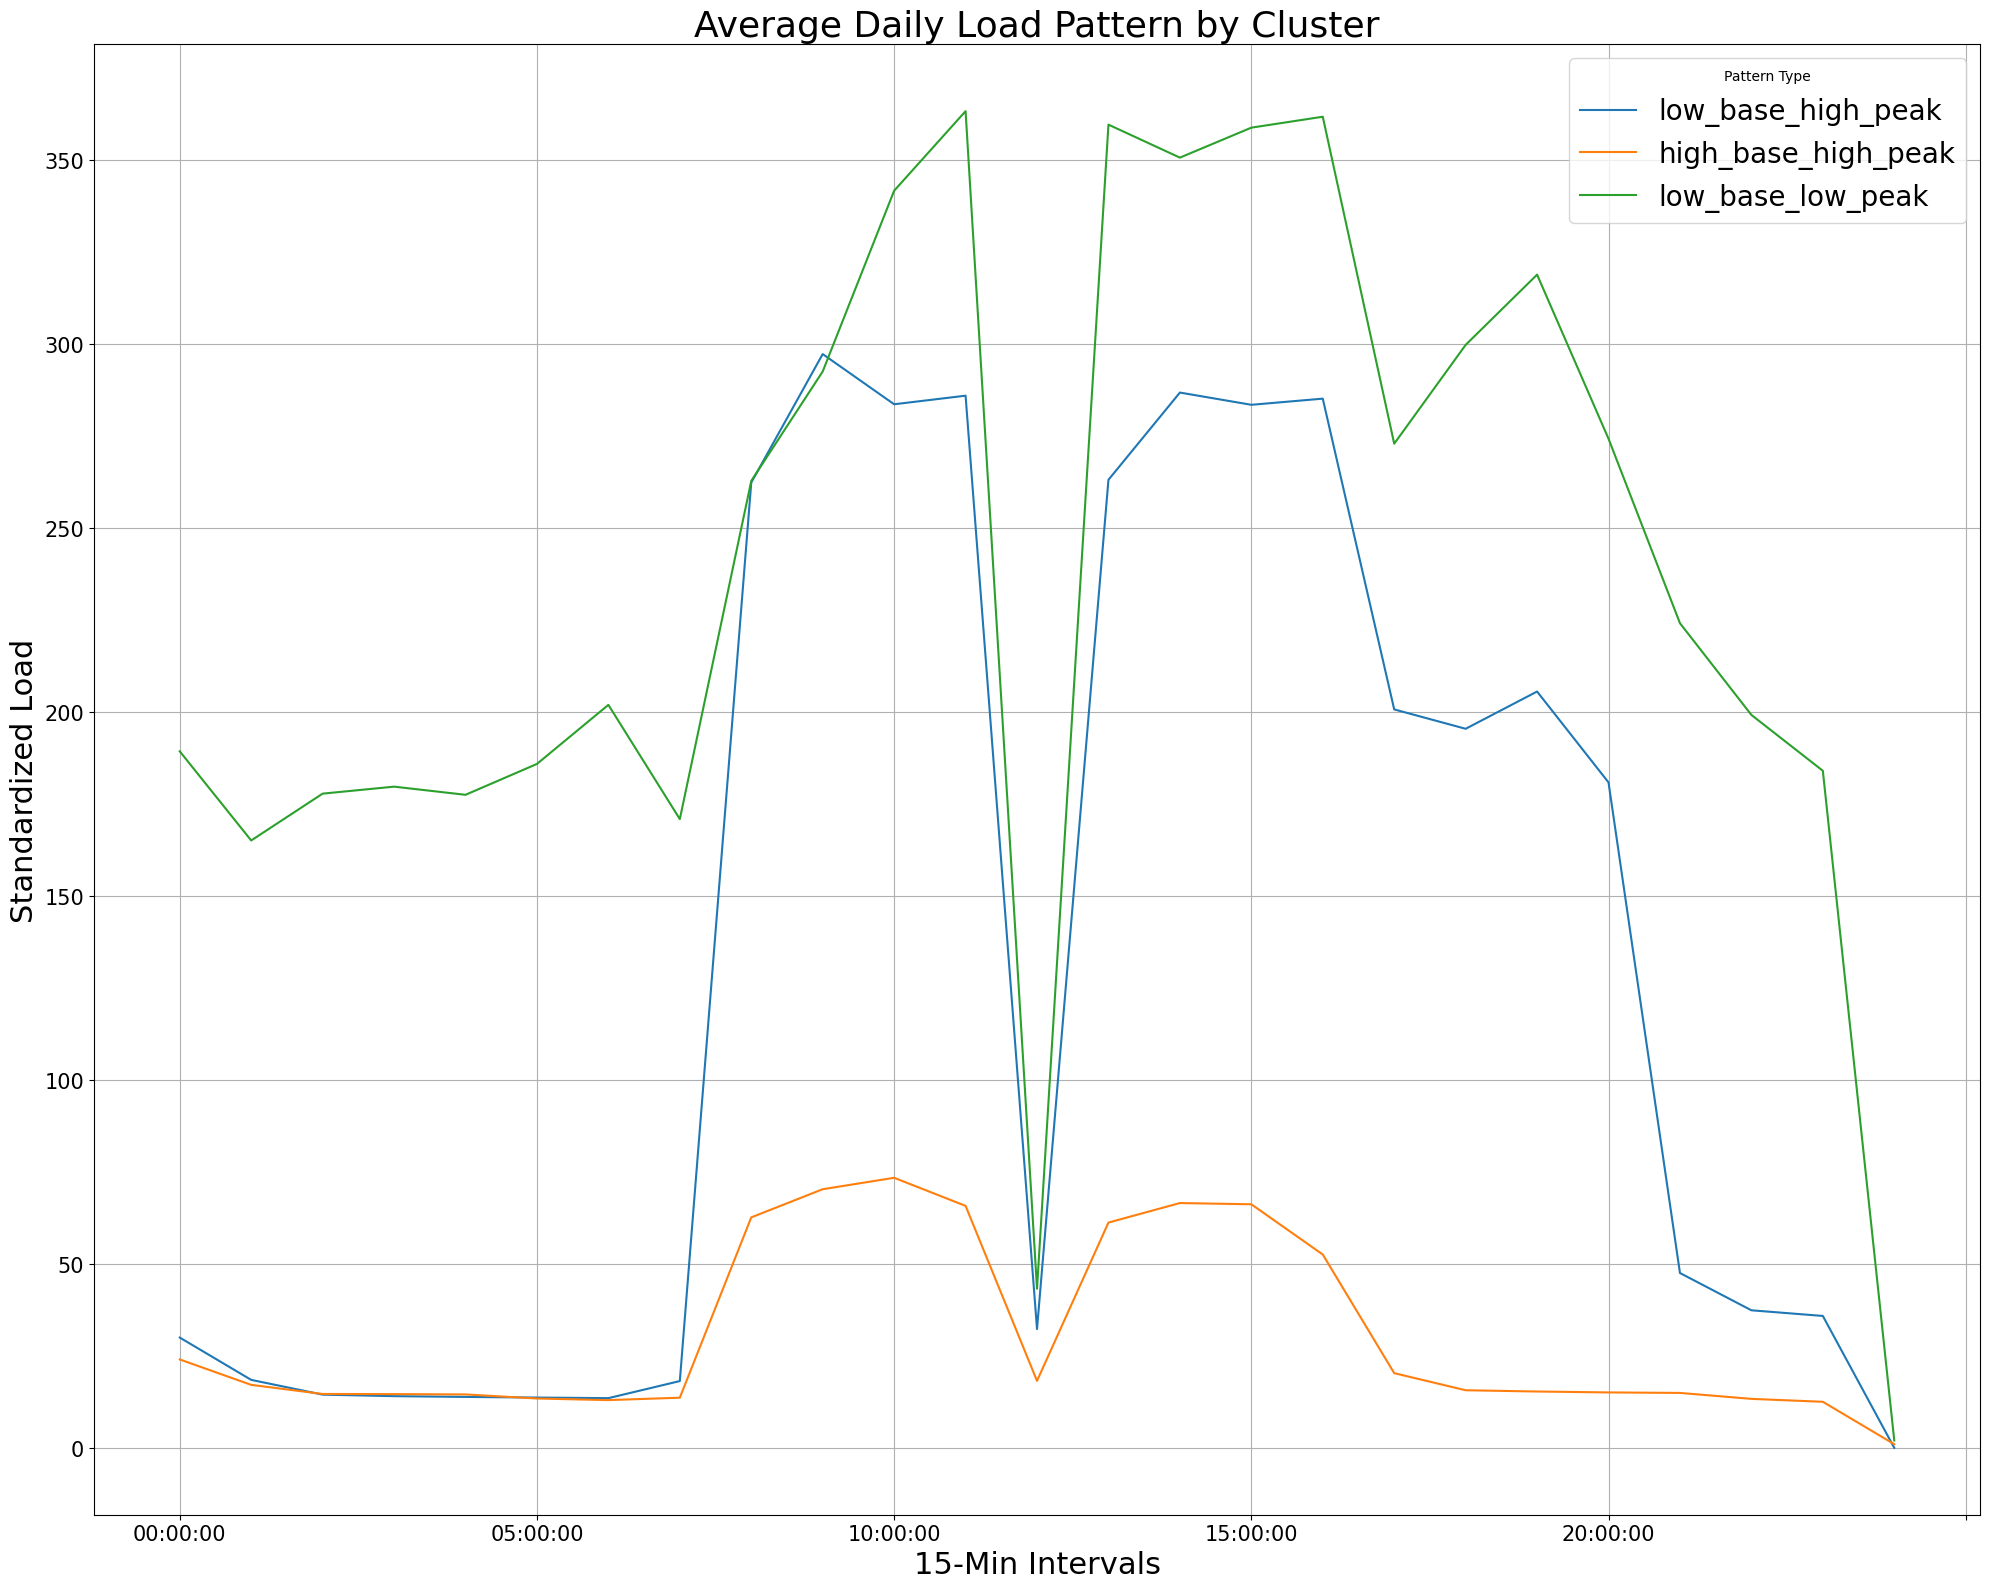

In [135]:
load_columns = pivot_df.columns[:96]

# Ensure clustering has been done and column exists
assert 'cluster' in pivot_df.columns, "Missing 'cluster' column. Run KMeans first."

# Group by cluster, average the first 96 load columns
avg_by_label = pivot_df.groupby("cluster")[load_columns].mean()

# Define custom labels
cluster_name_map = {
    0: "low_base_high_peak",
    1: "high_base_high_peak",
    2: "low_base_low_peak"
}

# Rename cluster index to meaningful names
avg_by_label.index = avg_by_label.index.map(cluster_name_map)

# Plot
avg_by_label.T.plot(figsize=(20, 16))
plt.title("Average Daily Load Pattern by Cluster", fontsize=26)
plt.xlabel("15-Min Intervals", fontsize=22)
plt.ylabel("Standardized Load", fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title="Pattern Type", fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()


In [136]:
for c in sorted(pivot_df['cluster'].unique()):
    print(f"\nCluster {c}:")
    print(pivot_df[pivot_df['cluster'] == c].index.tolist()[:10]) 


Cluster 0:
[datetime.date(2018, 1, 2), datetime.date(2018, 1, 3), datetime.date(2018, 1, 4), datetime.date(2018, 1, 5), datetime.date(2018, 1, 8), datetime.date(2018, 1, 9), datetime.date(2018, 1, 10), datetime.date(2018, 1, 11), datetime.date(2018, 1, 12), datetime.date(2018, 1, 13)]

Cluster 1:
[datetime.date(2018, 1, 1), datetime.date(2018, 1, 6), datetime.date(2018, 1, 7), datetime.date(2018, 1, 14), datetime.date(2018, 1, 21), datetime.date(2018, 1, 27), datetime.date(2018, 1, 28), datetime.date(2018, 2, 4), datetime.date(2018, 2, 10), datetime.date(2018, 2, 11)]

Cluster 2:
[datetime.date(2018, 1, 18), datetime.date(2018, 1, 19), datetime.date(2018, 1, 20), datetime.date(2018, 1, 23), datetime.date(2018, 1, 24), datetime.date(2018, 1, 25), datetime.date(2018, 1, 26)]


In [137]:
pivot_df.to_csv("daily_load_with_clusters_and_labels.csv")


In [138]:
pivot_df.reset_index(inplace=True)  # This adds index back as a column


pivot_df['season'] = pivot_df['date'].apply(get_season)


In [142]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

pivot_df['season'] = pivot_df['date'].apply(get_season)

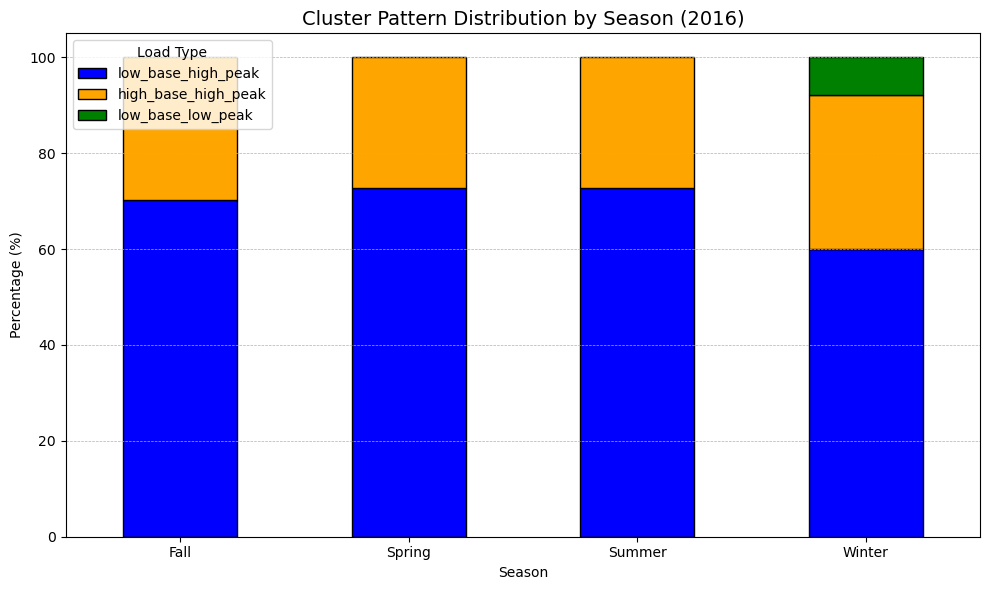

In [146]:
pivot_df = pd.read_csv("daily_load_with_clusters_and_labels.csv")

# Step 1: Clean columns
pivot_df.columns = [col.strip() for col in pivot_df.columns]
pivot_df['date'] = pd.to_datetime(pivot_df['date'])

# Step 2: Extract features (hourly load only)
load_columns = pivot_df.columns.drop('date')
X = pivot_df[load_columns]

# Step 3: Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
pivot_df['cluster'] = kmeans.fit_predict(X_scaled)

# Optional: Map cluster index to names
cluster_name_map = {
    0: "low_base_high_peak",
    1: "high_base_high_peak",
    2: "low_base_low_peak"
}
pivot_df['pattern'] = pivot_df['cluster'].map(cluster_name_map)
#Step 5: Assign season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

pivot_df['season'] = pivot_df['date'].apply(get_season)


cluster_counts = pivot_df.groupby(['season', 'pattern']).size().unstack(fill_value=0)
cluster_pct = cluster_counts.div(cluster_counts.sum(axis=1), axis=0) * 100


cluster_pct = cluster_pct[['low_base_high_peak', 'high_base_high_peak', 'low_base_low_peak']]

color_map = {
    'low_base_high_peak': 'blue',
    'high_base_high_peak': 'orange',
    'low_base_low_peak': 'green'
}
colors = [color_map[col] for col in cluster_pct.columns]




# Step 7: Plot
ax = cluster_pct.plot(kind='bar', stacked=True, figsize=(10, 6), edgecolor='black', color=colors)
plt.title('Cluster Pattern Distribution by Season (2016)', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.legend(title='Load Type')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

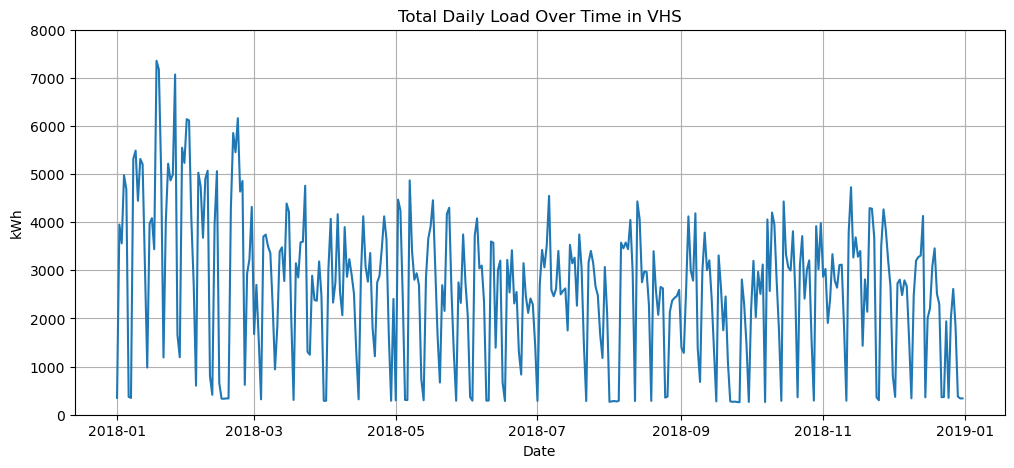

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# 0. 读入数据
df = pd.read_csv("daily_load_with_clusters_and_labels.csv")

# ✅ 确保你有 'date' 和 'cluster' 列
df['date'] = pd.to_datetime(df['date'])

# ✅ 定义 pivot_df（不要跳过这步！）
pivot_df = df.copy()

# 1. 映射 pattern 和 season
pivot_df['pattern'] = pivot_df['cluster'].map(cluster_name_map)
pivot_df['season'] = pivot_df['date'].apply(get_season)

# 2. 列名转为字符串（以免是 datetime.time）
pivot_df.columns = pivot_df.columns.map(str)

# 3. 提取负载列（非 date/cluster/pattern/season）
load_columns = [col for col in pivot_df.columns if col not in ['date', 'cluster', 'pattern', 'season']]

# 4. 提取特征
features_df = pd.DataFrame(index=pivot_df.index)
features_df["total_load"] = pivot_df[load_columns].sum(axis=1)
features_df["peak_load"] = pivot_df[load_columns].max(axis=1)
features_df["valley_load"] = pivot_df[load_columns].min(axis=1)
features_df["load_range"] = features_df["peak_load"] - features_df["valley_load"]
features_df["load_std"] = pivot_df[load_columns].std(axis=1)
features_df["time_of_peak"] = pivot_df[load_columns].idxmax(axis=1)
features_df["time_of_valley"] = pivot_df[load_columns].idxmin(axis=1)

# 5. 取出纯时间部分
features_df["time_of_peak"] = features_df["time_of_peak"].str[-8:]
features_df["time_of_valley"] = features_df["time_of_valley"].str[-8:]

# ✅ 修复 plot，x 轴用日期
plt.figure(figsize=(12, 5))
plt.plot(pivot_df['date'], features_df["total_load"])
plt.title("Total Daily Load Over Time in VHS")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.ylim(0,8000)
plt.grid(True)
plt.show()


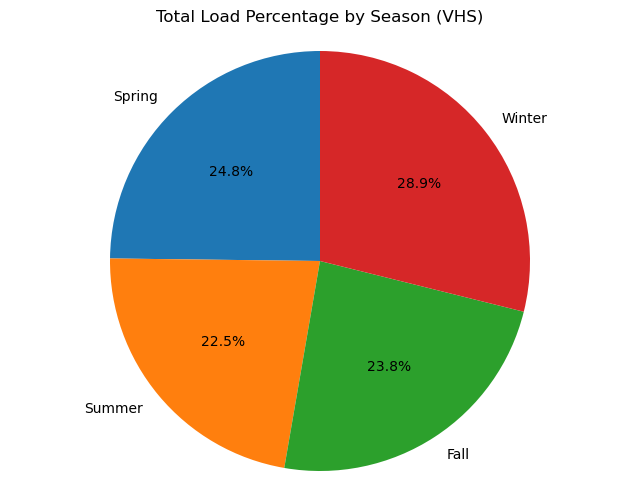

In [152]:
# Define hourly columns (assuming 24 hourly load columns, or more)
hourly_columns = [col for col in pivot_df.columns if col not in ['date', 'season', 'pattern', 'cluster']]

# Calculate total load per day (sum across hours)
pivot_df['total_load'] = pivot_df[hourly_columns].sum(axis=1)

# Group by season
season_total = pivot_df.groupby('season')['total_load'].sum()

# Optional: reorder to logical season sequence
season_total = season_total[['Spring', 'Summer', 'Fall', 'Winter']]  # Skip if missing any

# Plot
plt.figure(figsize=(8, 6))
plt.pie(season_total, labels=season_total.index, autopct='%1.1f%%', startangle=90)
plt.title("Total Load Percentage by Season (VHS)")
plt.axis('equal')
plt.show()

